In [1]:
#import pymongo 
import pandas as pd
import logging
#import bson
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings(action='ignore')
import time
import pprint
import pickle
import random
import numpy as np
from sklearn.metrics import accuracy_score,precision_recall_curve, average_precision_score, confusion_matrix
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
from pprint import pprint
from datetime import datetime
import re
import json
import pandas
import operator
from functools import reduce
import editdistance
import copy
import regex
from nltk.tokenize import RegexpTokenizer
from string import punctuation
from nltk.corpus import stopwords
import textrazor

In [44]:
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
textrazor.api_key = '112d39a9f10234c8405b9cc04f6fc708ba540b18e13ff3e5d92e09f6' #cla.giussani

In [ ]:
textrazor.api_key = 'e12b234d9560569e031878f6351e7b4a2fc20f57893a2f443e315bc1' #samuele.morassi

In [ ]:
textrazor.api_key = '151a3673790d45b82cee80457841ae7a0700008e04642c6b0ded28d9' #claudia.giussani@studenti.unimi.it

In [3]:
cognomi_I = pickle.load( open( "Discorsi-I-legis/cognomi_discorsi.p", "rb" ) )

In [4]:
cognomi_XVIII = pickle.load( open( "Discorsi-XVIII-legis/cognomi_discorsi.p", "rb" ) )

In [58]:
cognomi_XVII = pickle.load( open( "Discorsi-XVII-legis/cognomi_discorsi.p", "rb" ) )

In [60]:
all_legis = {}

for cog in cognomi_I:
    all_legis[cog] = pickle.load( open( 'Discorsi_puliti_I/'+cog+".p", "rb" ) )
    
for cog in cognomi_XVIII:
    all_legis[cog] = pickle.load( open( 'Discorsi_puliti_XVIII/'+cog+".p", "rb" ) )
    
for cog in cognomi_XVII:
    all_legis[cog] = pickle.load( open( 'Discorsi_puliti_XVII/'+cog+".p", "rb" ) )

In [62]:
for k in all_legis.keys():
    if len(all_legis[k]) > 500:
        print(k+" "+str(len(all_legis[k])))

MORO 1648
DE GASPERI 563
FANFANI 814
GRONCHI 16892
SEGNI 1331
LEONE 3917
DI VITTORIO 1456
GIOLITTI 883
MARTINO 4668
ALMIRANTE 680
RUSSO PEREZ 582
ROBERTO GIACHETTI 15421
MARIA ROSARIA CARFAGNA 3860
FRANCESCO PAOLO SISTO 716
SIMONE BALDELLI 10412
LAURA BOLDRINI 12302
MARINA SERENI 11318
LUIGI DI MAIO 9666
RESOCONTO STENOGRAFICO 663
IGNAZIO LA RUSSA 768
NICOLA MOLTENI 557
MASSIMILIANO FEDRIGA 650
ROCCO PALESE 754
ARCANGELO SANNICANDRO 619
ANDREA COLLETTI 582
GIANLUCA BUONANNO 540
DAVIDE CRIPPA 841


In [63]:
leng= []
legis =[]
for k in all_legis.keys():
    if len(all_legis[k])>500:
        pprint(k+" "+str(len(all_legis[k])))
        legis.append(k)

'MORO 1648'
'DE GASPERI 563'
'FANFANI 814'
'GRONCHI 16892'
'SEGNI 1331'
'LEONE 3917'
'DI VITTORIO 1456'
'GIOLITTI 883'
'MARTINO 4668'
'ALMIRANTE 680'
'RUSSO PEREZ 582'
'ROBERTO GIACHETTI 15421'
'MARIA ROSARIA CARFAGNA 3860'
'FRANCESCO PAOLO SISTO 716'
'SIMONE BALDELLI 10412'
'LAURA BOLDRINI 12302'
'MARINA SERENI 11318'
'LUIGI DI MAIO 9666'
'RESOCONTO STENOGRAFICO 663'
'IGNAZIO LA RUSSA 768'
'NICOLA MOLTENI 557'
'MASSIMILIANO FEDRIGA 650'
'ROCCO PALESE 754'
'ARCANGELO SANNICANDRO 619'
'ANDREA COLLETTI 582'
'GIANLUCA BUONANNO 540'
'DAVIDE CRIPPA 841'


In [57]:
mean_len = []
median_len = []
for k in all_legis.keys():
    if len(all_legis[k]) > 500:
        print(k)
        print(len(all_legis[k]))
        leng = []
        for dis in all_legis[k]:
            leng.append(len(dis))
        mean_len.append(np.mean(leng))
        median_len.append(np.median(leng))

MORO
1648
DE GASPERI
563
FANFANI
814
GRONCHI
16892
SEGNI
1331
LEONE
3917
DI VITTORIO
1456
GIOLITTI
883
MARTINO
4668
ALMIRANTE
680
RUSSO PEREZ
582
ROBERTO FICO
5296
MARIA ROSARIA CARFAGNA
3860
MARIA EDERA SPADONI
3240
ETTORE ROSATO
4667
FABIO RAMPELLI
4157


In [56]:
print(all_legis['MARIA EDERA SPADONI'][350])

['collegare', 'ovviamente', 'presidenza', 'augurare', 'buon', 'chiedere', 'parlare', 'collegare', 'sisto', 'facoltà']


In [50]:
median_len

[108.0,
 27.0,
 16.0,
 12.0,
 19.0,
 14.0,
 9.5,
 30.0,
 15.0,
 34.0,
 11.0,
 8.0,
 10.0,
 9.0,
 10.0,
 10.0]

In [12]:
discorsi_ridotti = {}

In [64]:
for cog in legis:
    discorsi_ridotti[cog] = []
    for d in all_legis[cog]:
        if len(d) > 20:
            discorsi_ridotti[cog].append(d)
            

In [65]:
for cog in legis:
    print(cog+ " "+str(len(discorsi_ridotti[cog])))
    
    # opzioni:
    # - faccio varie key di text razor e le faccio andare in parallelo
    # - raggruppo i discorsi: in 10 o a coppie

MORO 1324
DE GASPERI 307
FANFANI 363
GRONCHI 6462
SEGNI 649
LEONE 1655
DI VITTORIO 525
GIOLITTI 493
MARTINO 1998
ALMIRANTE 395
RUSSO PEREZ 228
ROBERTO GIACHETTI 5440
MARIA ROSARIA CARFAGNA 1222
FRANCESCO PAOLO SISTO 485
SIMONE BALDELLI 3843
LAURA BOLDRINI 3070
MARINA SERENI 3621
LUIGI DI MAIO 3170
RESOCONTO STENOGRAFICO 513
IGNAZIO LA RUSSA 241
NICOLA MOLTENI 381
MASSIMILIANO FEDRIGA 374
ROCCO PALESE 523
ARCANGELO SANNICANDRO 433
ANDREA COLLETTI 330
GIANLUCA BUONANNO 172
DAVIDE CRIPPA 430


In [15]:
all_legis.keys()

dict_keys(['MORO', 'SCALFARO', 'DE GASPERI', 'FANFANI', 'GRONCHI', 'SEGNI', 'LEONE', 'RUMOR', 'ANDREOTTI', 'TOGLIATTI', 'AMENDOLA', 'DI VITTORIO', 'GIOLITTI', 'INGRAO', 'IOTTI', 'PAJETTA GIANCARLO', 'LONGO', 'NENNI', 'MATTEOTTI', 'BASSO', 'MANCINI', 'DE MARTINO', 'CALAMANDREI', 'SARAGAT', 'MARTINO', 'LA MALFA', 'PACCIARDI', 'ALMIRANTE', 'RUSSO PEREZ', 'COVELLI', 'ROBERTO GIACHETTI', 'ROBERTO FICO', 'MARIA ROSARIA CARFAGNA', 'MARIA EDERA SPADONI', 'ETTORE ROSATO', 'FABIO RAMPELLI', 'PIERO FASSINO', 'GIORGIA MELONI', 'FEDERICO FORNARO', 'MAURIZIO LUPI', 'ALESSANDRO FUSACCHIA', '(MISTO-+E- CD', 'CARLO FATUZZO', 'LUIGI MARATTIN', 'GIUSI BARTOLOZZI', 'RICCARDO ZUCCONI', 'ROSSELLA MURONI', 'SALVATORE DEIDDA', 'FRANCESCO PAOLO SISTO', 'STEFANO FASSINA', 'TOMMASO FOTI', 'RENATA POLVERINI', 'ALFREDO BAZOLI', 'ROBERTO MORASSUT', 'GIOVANNI DONZELLI', 'STEFANIA PEZZOPANE', 'LUCA PASTORINO', 'STEFANO CECCANTI', 'ROBERTO OCCHIUTO', 'ANDREA DELMASTRO DELLE', 'ANTONIO TASSO', 'GIORGIO MULE', 'EMANUELA

In [16]:
result_topic = {}

In [17]:
separator = ' '
prova = separator.join(all_legis['EMANUELE FIANO'][1])

In [15]:
print(prova)

sì fortuna potere parlare l ’ onorevole crosetto e dispiacere applauso deputato partire democratico volere segnalarle presidente collegare movimentare 5 stella concludere dire votare favorevole credere volere votare favorevole dimissione chiarezza ’ aulire credere dovere chiarire dire collegare intervento e rinviare e ’ accettazione o proporre dimissione pervenire lettera applauso deputato partire democratico e deputato italia chiarezza e sapere discutere credere signora presidente dovere dividere cosa citato prassi votare simpatia o stimare ovvero elemento incompatibilità leggere permanenza aulire riprendere parola ’ onorevole fusacchia o ’ onorevole fornaro lungi discutere simpatia e competenza ’ onorevole crosetto certamente l ’ aulire parlamentare diritto conoscere ciò essere presentare ’ iniziare richiedere dimissione questione personale sapere elemento comprenderlo presentare elemento diritto potere portare ’ incompatibilità consuetudine ’ aulire respingere istanza richiesta dimi

In [18]:
for cog in legis:
    result_topic[cog] = []
    for d in discorsi_ridotti[cog]:
        tex = separator.join(d)
        client = textrazor.TextRazor(extractors=["entities", "topics"])
        response = client.analyze(tex)
        res = []
        for entity in response.entities():
            res.append((entity.id, entity.relevance_score))

        result_topic[cog].append(res)
    

TextRazorAnalysisException: TextRazor returned HTTP Code 401: b'{"ok":false, "time":0, "error":"You have reached your daily TextRazor request limit. Please contact support@textrazor.com for more information, or visit https://www.textrazor.com to upgrade your account."}\n\n'

In [20]:
for cog in legis:
    if cog in result_topic.keys():
        pickle.dump( result_topic[cog], open( 'Result_topic/'+cog+".p", "wb" ) )

In [51]:
pprint((result_topic['MORO'])) # come faccio? prendo il max per ogni discorso? o faccio una media? bhooooo

[[('Quirinal Palace', 0),
  ('Repubblica', 0.5312),
  ('Residenza ufficiale', 0.04698),
  ('Monarchia', 0.2043),
  ('Repubblica', 0.4332),
  ('Democrazia', 0.2548),
  ('Monarchia', 0.2043),
  ('Italia', 0.2647),
  ('Palazzo del Quirinale', 0.3214),
  ('Repubblica', 0.5312),
  ('Democrazia', 0.2548),
  ('Dnestr', 0),
  ('Palermo', 0.2791),
  ('Sicilia', 0.2987),
  ('1', 0),
  ('europeo', 0),
  ('lazzo quirinale', 0),
  ('repubblicano democratico', 0)],
 [('marshall', 0),
  ('mezzogiorno', 0),
  ('isola', 0),
  ('togliatti', 0),
  ('Specie', 0.17)],
 [('Giulio Einaudi Editore', 0.1955),
  ('Deflazione (economia)', 0.4147),
  ('Deflazione (economia)', 0.4147),
  ('Sussidio', 0.2608),
  ('Mercato', 0.1988),
  ('Prezzo', 0.09547),
  ('Prezzo', 0.09547),
  ('nistica', 0),
  ('Prezzo', 0.09547),
  ('Euforia', 0.03265),
  ('Mercato', 0.1988),
  ('Sussidio', 0.2608),
  ('Disoccupazione', 0.3679),
  ('Imposta', 0.4303),
  ('Tassa', 0.3165),
  ('Reddito', 0.2641),
  ('Deflazione (economia)', 0.41

  ('Concorrenza (economia)', 0.3894),
  ('1949', 0),
  ('1949', 0),
  ('Cinema italiano', 0.5565),
  ('Cinema italiano', 0.5565),
  ('Mercato', 0.3466),
  ('Mercato', 0.3466),
  ('Sabotaggio', 0.05557),
  ('Inflazione', 0.4952),
  ('Italia', 0.5108),
  ('Paesi Bassi', 0.449),
  ('Lingua italiana', 0.3595),
  ('Lingua italiana', 0.3595),
  ('Italia', 0.5108),
  ('Polonia', 0.4418),
  ('Cecoslovacchia', 0.3174),
  ('Argentina', 0.472),
  ('Belgio', 0.4717),
  ('Svezia', 0.4616),
  ('Portogallo', 0.4109),
  ('Italia', 0.5108),
  ('Asso (Italia)', 0.3297),
  ('Lingua italiana', 0.3595),
  ('Pressione', 0.1871),
  ('Lingua italiana', 0.3595),
  ('Italia', 0.5108),
  ('Inflazione', 0.4952),
  ('Italia', 0.5108),
  ('Colonia (Germania)', 0.2863),
  ('1948', 0),
  ('Francia', 0.4722),
  ('Mercato', 0.3466),
  ('Inghilterra', 0.3517),
  ('Francia', 0.4722),
  ('Francia', 0.4722),
  ('Francia', 0.4722),
  ('Inghilterra', 0.3459),
  ('Jugoslavia', 0.1803),
  ('Lingua italiana', 0.3595),
  ('Itali

  ('pearson', 0)],
 [('Cecoslovacchia', 0.1056),
  ('Unione Sovietica', 0.08834),
  ('1949', 0),
  ('sovietico cecoslovacchia', 0)],
 [('Veto', 0.2337),
  ('Italia', 0.3681),
  ('1949', 0),
  ('Cecoslovacchia', 0.2206),
  ('Fede', 0.3789),
  ('Europa', 0.368),
  ("Organizzazione del Trattato dell'Atlantico del Nord", 0.3161),
  ('Ragione', 0.4201),
  ('Austria', 0.2592),
  ('Lingua italiana', 0.2938),
  ('Disturbo da deficit di attenzione/iperattività', 0.1846),
  ('Europa', 0.3418),
  ('Libertà', 0.3029),
  ('Russia', 0.3207),
  ('Russia', 0.3207),
  ('Russia', 0.3207),
  ('Russia', 0.3207),
  ('Russia', 0.3207),
  ('Russia', 0.3207),
  ('Russia', 0.3207),
  ('Russia', 0.3207),
  ('Russia', 0.3207),
  ('Libertà', 0.3029),
  ('Verità', 0.2895),
  ('Bile', 0.07478),
  ('Adolf Hitler', 0.4551),
  ('Sofisma', 0.1),
  ('Germania', 0.4049),
  ('Italia', 0.3681),
  ('Germania', 0.4049),
  ('Russia', 0.3207),
  ('1', 0),
  ('guglielmo', 0),
  ('nenni', 0),
  ('europeo', 0),
  ('europeo', 0),


  ('Cina', 0.5148),
  ('Cina', 0.5133),
  ('Guerra', 0.4476),
  ('Guerra', 0.4476),
  ('Guerra', 0.4476),
  ('Lingua greca', 0.1428),
  ('Grecia', 0.4633),
  ('Continente', 0.2848),
  ('America', 0.3009),
  ('Unione Sovietica', 0.5577),
  ('Paesi Bassi', 0.4249),
  ('Inghilterra', 0.303),
  ('Guerra popolare', 0.2798),
  ('Argo (Grecia)', 0.0267),
  ('Generale', 0.1789),
  ("Organizzazione del Trattato dell'Atlantico del Nord", 0.4711),
  ('Oceano Atlantico', 0.2358),
  ('Intelligenza', 0.2984),
  ('Confino', 0.3223),
  ('484', 0),
  ('Oceano Atlantico', 0.2358),
  ('Isole Aleutine', 0.1296),
  ('Bandiera', 0.3585),
  ('Guerra', 0.4476),
  ('Democrazia', 0.4251),
  ('Guerra', 0.4476),
  ("Stati Uniti d'America", 0.534),
  ('Rebbe', 0.01941),
  ('Unione Sovietica', 0.5577),
  ('Messico', 0.4503),
  ('Russia', 0.5025),
  ('Repubblica', 0.2983),
  ('Messico', 0.4503),
  ('Paesi Bassi', 0.4249),
  ('Inghilterra', 0.303),
  ('Francia', 0.4699),
  ('Formaggio', 0.1071),
  ('Guerra', 0.4476),

  ('Agricoltura', 0.4624),
  ('Sila', 0.231),
  ('Italia', 0.4583),
  ('Accordo commerciale', 0.07639),
  ('Ansia', 0.1461),
  ('Lecce', 0.3148),
  ('21 marzo', 0.008396),
  ('Mercato', 0.3282),
  ('7494', 0),
  ('120', 0),
  ('Repubblica Sociale Italiana', 0.437),
  ('Tabacco', 0.4845),
  ('Sigaretta', 0.4399),
  ('21', 0),
  ('21', 0),
  ('15', 0),
  ('293', 0),
  ('1', 0),
  ('levantino', 0),
  ('vasto', 0),
  ('espor', 0),
  ('ministero com mercio', 0),
  ('ministero finanza', 0),
  ('vasto', 0),
  ('levantino', 0),
  ('chinari', 0),
  ('villaggio', 0),
  ('zappa', 0),
  ('labc', 0)],
 [('1949', 0)],
 [('grecia turchia', 0),
  ('inter', 0),
  ('sareb', 0),
  ('produ', 0),
  ('Tonnellata', 0.06409),
  ('Tonnellata', 0.06409),
  ('Grecia', 0.3531),
  ('Bulgaria', 0.3582),
  ('Tabacco', 0.4203),
  ('Tabacco', 0.4203),
  ('Tabacco', 0.4203),
  ('Tabacco', 0.4203),
  ('Tabacco', 0.4203),
  ('Monopolio', 0.3306),
  ('Monopolio', 0.3306),
  ('Monopolio', 0.3306),
  ('Ragione', 0.4079),
  

 [],
 [('Discus throw', 0)],
 [('Questore (ordinamento italiano)', 0.1321), ('Catania', 0.08741)],
 [],
 [('Dnestr', 0.01994), ('inter', 0)],
 [('Vigneto', 0.05468),
  ('Terra', 0.2299),
  ('Irrigazione', 0.2593),
  ('30', 0),
  ('9', 0),
  ('36', 0),
  ('25', 0),
  ('54', 0),
  ('32', 0),
  ('4', 0),
  ('92', 0),
  ('6', 0),
  ('20', 0),
  ('20', 0),
  ('8', 0),
  ('20', 0),
  ('30', 0),
  ('0', 0),
  ('0', 0),
  ('Torlonia', 0.1894),
  ('Individual time trial', 0),
  ('Chieti', 0.2464),
  ('Gallus gallus domesticus', 0.2115),
  ('Verdura', 0.04495),
  ('Solanum lycopersicum', 0.2513),
  ('Chilogrammo', 0.1544),
  ('Repubblica Ceca', 0.2454),
  ('Ficus carica', 0.285),
  ('Noce (frutto)', 0.09652),
  ('Mandorla', 0.1648),
  ('Sus scrofa domesticus', 0.2022),
  ('Denaro', 0.189),
  ('Solta', 0.04219),
  ('Acle', 0),
  ('Economia', 0.3135),
  ('1948', 0),
  ('Economia', 0.3135),
  ('Italia', 0.3635),
  ('Mezzadria', 0.3722),
  ('Micelio', 0.09888),
  ('Monopolio', 0.195),
  ('Terra', 0.

  ('Salute', 0.4319),
  ('Glossario entomologico', 0.2686),
  ('Tirocinio', 0.375),
  ('Medicina', 0.503),
  ('Chirurgia', 0.4477),
  ('Reato', 0.3661),
  ('Università', 0.3761),
  ('Cavalieri Ospitalieri', 0.3468),
  ('Ospedale', 0.3772),
  ('Pienza', 0.188),
  ('Danno', 0.3868),
  ('Parto', 0.2919),
  ('4', 0),
  ('-5', 0),
  ('6', 0),
  ('6', 0)],
 [('Roma', 0.2877),
  ('Responsabilità', 0.3214),
  ('Illecito', 0.3082),
  ('Diritto', 0.2962),
  ('Palazzo Barberini', 0.273),
  ('Barberini', 0.1355),
  ('Palazzo Corsini al Parione', 0.1977),
  ('Corsini', 0.2541),
  ('Roma', 0.2877),
  ('Ordine pubblico', 0.2139),
  ('Diritto', 0.2962),
  ('800', 0),
  ('6', 0),
  ('15361', 0),
  ('Barberini', 0.1355),
  ('Roma', 0.2877),
  ('galleria roma', 0),
  ('galleria roma', 0)],
 [('33', 0),
  ('66', 0),
  ('50', 0),
  ('Economia', 0.3851),
  ('India', 0.372),
  ('Montagna', 0.361),
  ('Collina', 0.3273),
  ('Terra', 0.3112),
  ('Compensato', 0.06583),
  ('Ortaggio', 0.07669),
  ('Bestiame', 0

  ('Costituzione della Repubblica Italiana', 0.6771),
  ('Mario Scelba', 0.4076),
  ('Costituzione della Repubblica Italiana', 0.6771),
  ('Senato', 0.2643),
  ('Costituzione della Repubblica Italiana', 0.6771),
  ('Bile', 0.07353),
  ('26', 0),
  ('26', 0),
  ('26', 0),
  ('templare', 0)],
 [('10', 0),
  ('19', 0),
  ('Costituzione', 0.2471),
  ('Scevà', 0.04225),
  ('Inter-Services Intelligence', 0.07437),
  ('Singolo (musica)', 0.01744),
  ('1950', 0)],
 [('Bergamo', 0.2069),
  ('Germania', 0.2515),
  ('Central Intelligence Agency', 0.2364),
  ('Inghilterra', 0.1712),
  ('1880', 0),
  ('1950', 0),
  ('1880', 0),
  ('italiano', 0),
  ('germania fran', 0)],
 [('1950', 0),
  ('Prefetto', 0.08541),
  ('Questore (ordinamento italiano)', 0.4538)],
 [('Giudice', 0.192),
  ('Giudice', 0.192),
  ('Neva', 0),
  ('Rebbe', 0),
  ('Legislatore', 0.08191),
  ('1950', 0),
  ('214', 0),
  ('tica', 0)],
 [('Diritto', 0.4249),
  ('Senato', 0.442),
  ('Camera dei deputati (Italia)', 0.7449),
  ('Liber

  ('scalfaro', 0),
  ('laura diaz', 0)],
 [('Tribunale', 0.0977),
  ('Partito Repubblicano Italiano', 0.3239),
  ('Pensiero', 0.4152),
  ('1950', 0),
  ('Delitto', 0.3162),
  ('Reato', 0.4625),
  ('Papa', 0.2035),
  ('Ingiuria (ordinamento penale italiano)', 0.2717),
  ('Reato', 0.4625),
  ('Assoluzione (diritto)', 0.1318),
  ('Deputato', 0.2099),
  ('Avvocato', 0.2272),
  ('Toga', 0.2436),
  ('Magistrato', 0.08876),
  ('Codice penale italiano', 0.1896),
  ('8', 0),
  ('cox', 0),
  ('laura diaz', 0),
  ('togliatti', 0)],
 [('Reazione a catena della polimerasi', 0.1055),
  ('1950', 0),
  ('7', 0),
  ('11', 0),
  ('Democrazia', 0.2195),
  ('Serafino', 0.09775),
  ('Cleto (Italia)', 0.1698),
  ('Reazione a catena della polimerasi', 0.1055),
  ('TiVo', 0),
  ('Sangue', 0.1002),
  ('Ra', 0.1348),
  ('11', 0),
  ('santoro', 0),
  ('tici', 0),
  ('repubblicano', 0),
  ('italiano', 0)],
 [('Autorità', 0.2514),
  ('Petizione', 0.2803),
  ('Religione', 0.3428),
  ('Consuetudine', 0.4057),
  ('Ni

  ('Morale', 0.1372),
  ('Laico', 0.05316),
  ('Magistrato', 0.173),
  ('Magistrato', 0.173),
  ('Magistrato', 0.173),
  ('Competenza', 0.4715),
  ('Competenza', 0.4715),
  ('Collegio unico', 0.03142),
  ('Common Era', 0),
  ('Coin', 0),
  ('Giudice', 0.392),
  ('Magistrato', 0.173),
  ('Collegio unico', 0.03142),
  ('Diritto', 0.3478),
  ('Saggezza', 0.4283),
  ('Norma giuridica', 0.3049),
  ('Costituzione', 0.3687),
  ('Competenza', 0.4715),
  ('1950', 0),
  ('Tatura', 0)],
 [('1616', 0),
  ('1931', 0),
  ('Giuria', 0.3382),
  ('Giuria', 0.3382),
  ('Giuria', 0.3382),
  ('1934', 0),
  ('Ragione', 0.5401),
  ('Ragione', 0.5401),
  ('Avvocato', 0.3565),
  ('Pensiero', 0.4596),
  ('Pensiero', 0.4596),
  ('Diritto', 0.4387),
  ('Costituzione', 0.4448),
  ('Potere', 0.3766),
  ('Diritto', 0.4367),
  ('Guardasigilli', 0.07827),
  ('Lingua italiana', 0.352),
  ('1934', 0),
  ('Referendum', 0.3506),
  ('Plebiscito', 0.1783),
  ('1943', 0),
  ('Scabino', 0.3353),
  ('Pensiero', 0.4596),
  ('C

In [ ]:
# per ogni discorso decido di tenere solo i topic con rilevanza maggiore del 0.4

In [21]:
topic_reduct = {}
for cog in result_topic.keys():
    topic_reduct[cog] = []
    for dis in result_topic[cog]:
        l = []
        for t in dis:
            if t[1] > 0.3:
                l.append(t)
        topic_reduct[cog].append(l)

In [22]:
topic_reduct

{'TOGLIATTI': [[('Ministero statale', 0.4369),
   ('Deputato', 0.326),
   ('Ministero statale', 0.4369)],
  [('Italia', 0.3449),
   ('Corruzione', 0.3044),
   ('Economia', 0.3427),
   ('Italia', 0.3449)],
  [('Terra', 0.3063),
   ('Guerra', 0.3733),
   ('Trani', 0.3104),
   ('Economia', 0.4926),
   ('Diritto', 0.3248),
   ('Dignità', 0.3252),
   ('Parlamento', 0.5759),
   ('Iosif Stalin', 0.4209),
   ('Parlamento', 0.5759),
   ('Costituzione della Repubblica Italiana', 0.6291),
   ('Potere', 0.3609),
   ('Parlamento', 0.5759)],
  [('Diritto', 0.3776),
   ('Deputato', 0.3589),
   ('Dottrina (diritto)', 0.3961),
   ('Potere esecutivo', 0.4956),
   ('Diritto', 0.3776)],
  [],
  [],
  [],
  [('Camera dei deputati (Italia)', 0.42),
   ('Costituzione della Repubblica Italiana', 0.628),
   ('Costituzione della Repubblica Italiana', 0.628),
   ('Alcide De Gasperi', 0.4289),
   ('IRI', 0.3178),
   ('Libertà', 0.341),
   ('Costituzione della Repubblica Italiana', 0.628)],
  [],
  [('Agricoltura'

In [24]:
topic = {}
for cog in topic_reduct.keys():
    topic[cog] = {}
    for dis in topic_reduct[cog]:
        for t in dis:
            if t[0] in topic[cog].keys():
                topic[cog][t[0]] = topic[cog][t[0]] +1
            else: topic[cog][t[0]] = 1

In [ ]:
# normalizzo

for cog in topic_reduct.keys():

In [25]:
topic_dict = {}
for cog in topic.keys():
    topic_dict[cog] = {elem:topic[cog][elem] for elem in topic[cog].keys() if topic[cog][elem] > 3}

In [26]:
for cog in topic_dict.keys():
    topic_dict[cog] = {k: v for k, v in sorted(topic_dict[cog].items(), key=lambda item: item[1], reverse = True)}
#frequenza ordinata dei topic presenti

In [28]:
print(topic_dict.keys())

dict_keys(['TOGLIATTI', 'BASSO', 'LA MALFA'])


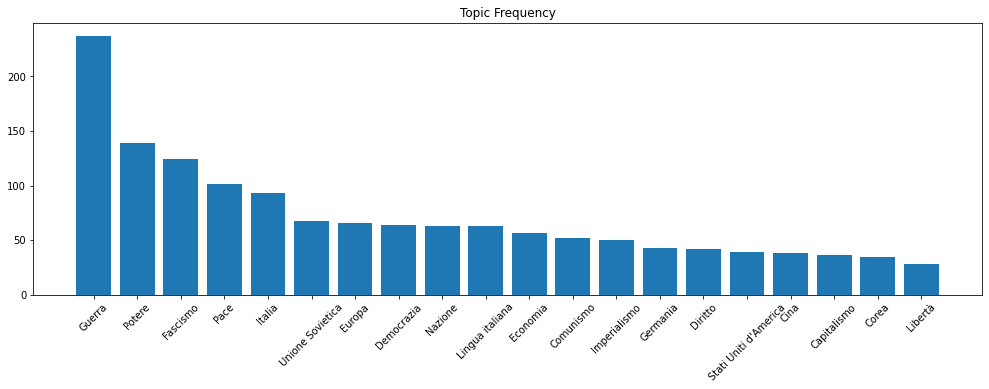

In [29]:
names = [elem for elem in topic_dict['TOGLIATTI'].keys()][0:20]
values = [topic_dict['TOGLIATTI'][elem] for elem in topic_dict['TOGLIATTI'].keys()][0:20]

plt.figure(figsize=(17, 5))

plt.plot(131)
plt.bar(names, values)
plt.xticks(rotation = 45)
plt.title('Topic Frequency')
plt.show()

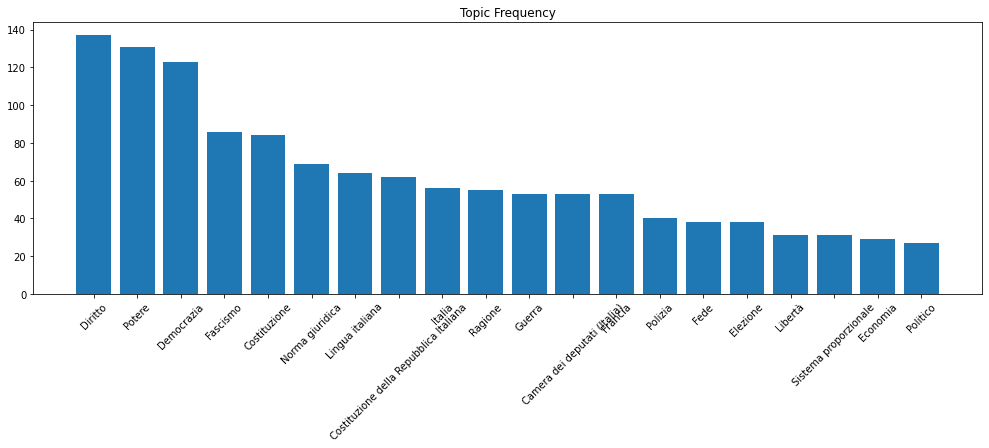

In [30]:
names = [elem for elem in topic_dict['BASSO'].keys()][0:20]
values = [topic_dict['BASSO'][elem] for elem in topic_dict['BASSO'].keys()][0:20]

plt.figure(figsize=(17, 5))

plt.plot(131)
plt.bar(names, values)
plt.xticks(rotation = 45)
plt.title('Topic Frequency')
plt.show()

In [40]:
topic_set = set(topic_dict['BASSO'].keys()).union(set(topic_dict['TOGLIATTI'].keys()))
print(len(topic_set))
print(len(topic_dict['BASSO'].keys()))
print(len(topic_dict['TOGLIATTI'].keys()))

178
140
109


In [41]:
topic_value = {}
topic_value['BASSO'] = []
topic_value['TOGLIATTI'] = []

for word in topic_set:
    if word in topic_dict['BASSO'].keys():
        topic_value['BASSO'].append(topic_dict['BASSO'][word])
    else:
        topic_value['BASSO'].append(0)
    if word in topic_dict['TOGLIATTI'].keys():
        topic_value['TOGLIATTI'].append(topic_dict['TOGLIATTI'][word])
    else:
        topic_value['TOGLIATTI'].append(0)

In [66]:
for cog in topic_value.keys():
    somma = sum(topic_value[cog])
    topic_value[cog] = [elem/somma for elem in topic_value[cog]]

In [67]:
cosine_similarity([topic_value['TOGLIATTI']], [topic_value['BASSO']])

array([[0.63493711]])

In [68]:
topic_value['TOGLIATTI']

[0.04202440126525079,
 0.0022593764121102574,
 0.0,
 0.028468142792589246,
 0.0027112516945323093,
 0.0,
 0.0018075011296882061,
 0.004518752824220515,
 0.0,
 0.0,
 0.0027112516945323093,
 0.0018075011296882061,
 0.0,
 0.0,
 0.0,
 0.004066877541798464,
 0.0,
 0.0,
 0.025756891098056935,
 0.0,
 0.0022593764121102574,
 0.0022593764121102574,
 0.0018075011296882061,
 0.0027112516945323093,
 0.0,
 0.0027112516945323093,
 0.0,
 0.0027112516945323093,
 0.0,
 0.0036150022593764122,
 0.0018075011296882061,
 0.0,
 0.0,
 0.0036150022593764122,
 0.0018075011296882061,
 0.0063262539539087215,
 0.0,
 0.0,
 0.0027112516945323093,
 0.0022593764121102574,
 0.0018075011296882061,
 0.0,
 0.0018075011296882061,
 0.0,
 0.0,
 0.005422503389064619,
 0.030727519204699502,
 0.06281066425666516,
 0.0027112516945323093,
 0.019430637144148215,
 0.009489380930863081,
 0.006778129236330773,
 0.0027112516945323093,
 0.006778129236330773,
 0.05603253502033439,
 0.0018075011296882061,
 0.0,
 0.0,
 0.02846814279258924

In [31]:
topic_value = {}
for cog in topic_dict.keys():
    topic_value[cog] = {elem:[] for elem in topic_dict[cog].keys()}

for cog in topic_dict.keys():
    for d in topic_reduct[cog]:
        for t in d:
            if t[0] in topic_dict[cog].keys():
                topic_value[cog][t[0]].append(t[1])

In [ ]:
#da qua sistemare

In [100]:
topic_relevance = {}
#somma delle relevance di ciascun topic, dovrei normalizzarlo?

for t in topic_value.keys():
    topic_relevance[t] = sum(topic_value[t])

In [102]:
topic_relevance = {k: v for k, v in sorted(topic_relevance.items(), key=lambda item: item[1], reverse = True)}

#ordino i topic in base alla loro relevance semplicemente sommando le diverse relevance

In [103]:
topic_relevance

{'Diritto': 86.84159999999997,
 'Guerra': 71.35359999999999,
 'Italia': 69.20339999999999,
 'Potere': 59.48949999999995,
 'Lingua italiana': 55.575100000000006,
 'Giudice': 47.052499999999995,
 'Democrazia': 42.028900000000014,
 'Proprietà (diritto)': 40.9355,
 'Ragione': 39.4404,
 'Pace': 39.270300000000006,
 'Fascismo': 37.33309999999998,
 'Sentenza': 29.2625,
 'Reato': 27.16440000000001,
 'Europa': 26.024000000000022,
 'Economia': 24.517999999999997,
 'Francia': 22.847800000000003,
 'Libertà': 21.050400000000003,
 'Germania nazista': 20.609400000000008,
 'Agricoltura': 20.428199999999997,
 'Norma giuridica': 20.31119999999999,
 'Sicilia': 20.248499999999996,
 "Stati Uniti d'America": 20.0599,
 'Giuria': 19.626,
 'Costituzione della Repubblica Italiana': 19.499100000000002,
 'Germania': 17.6289,
 'Nazione': 17.049699999999994,
 'Unione Sovietica': 16.767999999999997,
 'Reddito': 16.7594,
 'Costituzione': 16.448199999999996,
 'Russia': 15.544800000000002,
 'Camera dei deputati (Italia

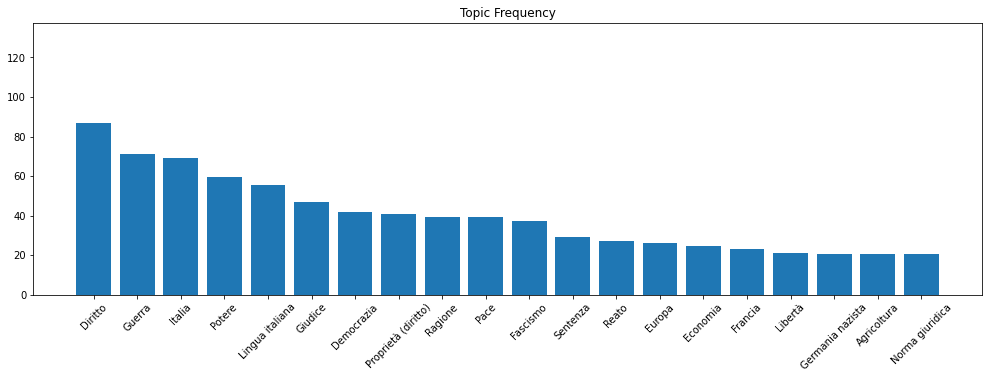

In [104]:
names = [elem for elem in topic_relevance.keys()][0:20]
values = [topic_relevance[elem] for elem in topic_relevance.keys()][0:20]

plt.figure(figsize=(17, 5))

plt.plot(131)
plt.bar(names, values)
plt.xticks(rotation = 45)
plt.title('Topic Frequency')
plt.show()

In [ ]:
#ARRIVATA QUA!

# a questo punto farei il solito confronto tramite cosine similarity

In [47]:
topic_value = {elem:[] for elem in topic_dict.keys()}

for d in result_topic['MORO']:
    for t in d:
        if t[0] in topic_value.keys():
            topic_value[t[0]].append(t[1])
    

In [50]:
for t in topic_value.keys():
    me = np.mean(topic_value[t])
    if me != 0:
        print(t+ " "+str(me))

Repubblica 0.3054944444444445
Monarchia 0.2264
Democrazia 0.44771176470588236
Italia 0.40051597989949744
Dnestr 0.01815088888888889
Sicilia 0.44248943396226414
Specie 0.266028205128205
Deflazione (economia) 0.45854
Sussidio 0.14644285714285712
Mercato 0.322931914893617
Prezzo 0.133391875
Disoccupazione 0.31687499999999996
Imposta 0.57841875
Tassa 0.36865
Reddito 0.5086085714285714
Economia 0.3858277777777778
Induismo 0.23667999999999997
Inflazione 0.4887666666666667
Classe lavoratrice 0.069635
Produzione 0.479372
Ricchezza 0.24545
Potere 0.4342299270072993
Sole 0.34715
Lingua italiana 0.3509838383838384
Natura 0.25584444444444443
Protezionismo 0.34752
Finanza 0.07583100000000001
Alcide De Gasperi 0.42982777777777775
Bos taurus 0.2938
Agricoltura 0.3911493846153846
Guerra 0.45053874999999993
Bestiame 0.18322
Trattore agricolo 0.3077666666666667
Banca 0.4457000000000001
Azienda 0.4454153846153846
Proprietà (diritto) 0.5607602739726028
Mezzadria 0.3532538461538462
Colonia (Germania) 0.163

In [ ]:
#vedere documentazione per capire cosa posso estrarne di buono

In [236]:
text = separator.join(politici['MATTEO SALVINI'][10])

In [237]:
client = textrazor.TextRazor(extractors=["entities", "topics", "categories"])
response = client.analyze(text)

for entity in response.entities():
    print(entity.id, entity.relevance_score)

Lega Nord 0.3593
Partito Democratico (Italia) 0.2948
Italia 0.1827


In [246]:
for entity in response.topics():
    print(entity.label, entity.score)

Politics 0.9872
Italy 0.6878
European Parliament party groups 0.6822
Politics of Italy 0.6357
Elections 0.5976
Government 0.5885
Political parties 0.5695
Lega Nord 0.5689
Pan-European political parties 0.5646
European Parliament 0.5643
Government-related organizations 0.5483
Political ideologies 0.5259
Organizational structure of political parties 0.5124
Political movements 0.509
Human activities 0.4935
Political organizations 0.484
Pro-Europeanism 0.4749
Europe 0.4747
Democratic Party (Italy) 0.4668
Political spectrum 0.4652
Public sphere 0.4299
Transnational political parties 0.421
Padanian nationalist parties 0.4142
Anti-globalization political parties 0.3897
Forms of government 0.3686
Organizations related to the European Union 0.3644
Parliamentary groups 0.3579
Member parties of the Identity and Democracy Party 0.3496
Politics of the European Union 0.3341
Eurosceptic parties 0.3329
International political organizations 0.326
Right-wing populist parties 0.3178
Party of European Soc

In [13]:
cognomi_XVIII = pickle.load( open( "Discorsi-XVIII-legis/cognomi_discorsi.p", "rb" ) )


In [14]:
XVIII_legis = {}
for cog in cognomi_XVIII:
    disc = pickle.load( open( "Discorsi-XVIII-legis/"+cog+".p", "rb" ) )
    XVIII_legis[cog] = disc

In [15]:
separator = ' '
for cog in XVIII_legis.keys():
    if XVIII_legis[cog]!= []:
        XVIII_legis[cog] = [separator.join(elem) for elem in XVIII_legis[cog]]

In [17]:
for doc in XVIII_legis['ROBERTO GIACHETTI'][0:10]:
    client = textrazor.TextRazor(extractors=["entities", "topics"])
    response = client.analyze(doc)

    for entity in response.entities():
        print(entity.id, entity.relevance_score)

46 0
2 0
XVI legislatura della Repubblica Italiana 0.3036
Legislatura 0.153
Camera dei deputati (Italia) 0.7155
Camera dei deputati (Italia) 0.7155
Camera dei deputati (Italia) 0.7111
Sistema elettorale 0.3527
Seggio elettorale 0.4835
Legislature del Regno di Sardegna 0.2168
2 0
11 0
XVII legislatura della Repubblica Italiana 0.4421
Legislatura 0.153
Camera dei deputati (Italia) 0.7155
2 0
Camera dei deputati (Italia) 0.7155
Legislatura 0.153
Costituzione della Repubblica Italiana 0.618
Costituzione della Repubblica Italiana 0.618
Sistema elettorale 0.3527
2 0
Gregorio Fontana 0
Presidente della Camera dei deputati 0.4777
Camera dei deputati (Italia) 0.4923
Laura Boldrini 0.4178
Luigi Di Maio 0.372
Marina Sereni 0.224
Simone Baldelli 0.4479
Politica 0.3164
Lessico 0.2888
Propaganda 0.5728
Camera dei deputati (Italia) 0.4923
Parlamento 0.5299
Parlamento 0.5341
Femminicidio 0.3366
Politica 0.3164
Vergogna 0.3532
Politica 0.3164
Speranza 0.496
Politica 0.3164
Diritto 0.3597
Lingua italian

## LDA topic analysis

In [1]:
import nltk; nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Claudia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

In [3]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [4]:
import spacy

In [6]:
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

In [8]:
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [14]:
import pickle

In [12]:
#stopword già tolte nell'altro codice

In [15]:
cognomi_XVIII = pickle.load( open( "Discorsi-XVIII-legis/cognomi_discorsi.p", "rb" ) )

In [136]:
politici = {}
for cog in cognomi_XVIII:
    politici[cog] = pickle.load(open( 'Discorsi-XVIII-legis/'+cog+".p", "rb" ) )

In [135]:
df = pd.DataFrame.from_dict(politici, orient='index')

In [130]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,5286,5287,5288,5289,5290,5291,5292,5293,5294,5295
ROBERTO GIACHETTI,"[La, seduta, è, aperta, Missioni]","[Comunico, che, ai, sensi, dell, 'articolo, 46...","[Ricordo, che, la, Camera, è, riunita, in, qua...","[(Si, leva, in, piedi, e, con, lui, l, ’intera...","[Desidero, precisare, che, essendo, oggi, la, ...","[Comunico, che, in, data, 24, febbraio, 2018, ...","[Comunico, che, in, data, 8, marzo, 2018, il, ...","[Comunico, che, in, data, 14, marzo, 2018, il,...","[Comunico, che, è, deceduto, l, ’onorevole, Gi...","[Comunico, che, in, data, 11, marzo, 2018, è, ...",...,None,None,None,None,None,None,None,None,None,None
ROBERTO FICO,"[(Pronunzia,, stando, in, piedi, il, seguente,...","[Ricordo, che, l, ’articolo, 14, comma, 3, del...","[Comunico, l, 'ordine, del, giorno, della, pro...","[La, seduta, è, aperta, Invito, il, deputato, ...","[Se, non, vi, sono, osservazioni, il, processo...","[Comunico, che, ai, sensi, dell, 'articolo, 46...","[Comunico, che, in, data, 24, marzo, 2018, la,...","[Comunico, che, in, data, 28, marzo, 2018, la,...","[Chiedo, al, deputato, segretario, provvisorio...","[Chiedo, al, deputato, segretario, provvisorio...",...,"[L, ’ordine, del, giorno, reca, lo, svolgiment...","[Passiamo, alla, prima, interrogazione, all, ’...","[Il, Ministro, per, i, Rapporti, con, il, Parl...","[Il, deputato, Molinari, ha, facoltà, di, repl...","[Il, deputato, Donzelli, ha, facoltà, di, illu...","[Il, Ministro, per, i, Rapporti, con, il, Parl...","[Il, deputato, Lollobrigida, ha, facoltà, di, ...","[Il, deputato, Tondo, ha, facoltà, di, illustr...","[La, Ministra, del, Lavoro, e, delle, politich...","[Ha, facoltà, di, replicare, il, deputato, Lup..."
MARIA ROSARIA CARFAGNA,"[(ORE, 14, ,35)]","[Dichiaro, chiusa, la, votazione, Invito, i, d...","[La, seduta, è, aperta, Invito, il, deputato, ...","[Se, non, vi, sono, osservazioni, il, processo...","[Comunico, che, ai, sensi, dell, 'articolo, 46...","[La, Ministra, per, i, rapporti, con, il, Parl...","[Ha, chiesto, di, intervenire, per, un, interv...","[La, ringrazio, onorevole, Fatuzzo, naturalmen...","[La, seduta, è, aperta, Invito, il, deputato, ...","[Se, non, vi, sono, osservazioni, il, processo...",...,None,None,None,None,None,None,None,None,None,None
MARIA EDERA SPADONI,"[(ore, 15, ,30), (Segue, la, votazione, ).]","[Comunico, che, lo, scorso, 18, marzo, la, nos...","[Dichiaro, chiusa, la, votazione, Invito, i, d...","[Comunico, il, risultato, della, votazione, pe...","[Comunico, che, con, lettera, pervenuta, in, d...","[Comunico, che, con, lettera, pervenuta, in, d...","[Comunico, che, con, lettera, pervenuta, in, d...","[Comunico, l, 'ordine, del, giorno, della, pro...","[La, seduta, è, aperta, Invito, il, deputato, ...","[Se, non, vi, sono, osservazioni, il, processo...",...,None,None,None,None,None,None,None,None,None,None
ETTORE ROSATO,"[(ore, 10, ,15)]","[È, iscritto, a, parlare, l, ’onorevole, Giorg...","[È, iscritta, a, parlare, l, ’onorevole, Rossi...","[È, iscritto, a, parlare, l, ’onorevole, Butti...","[È, iscritto, a, parlare, l, ’onorevole, Marat...","[È, iscritta, a, parlare, l, ’onorevole, Ruocc...","[È, iscritto, a, parlare, l, ’onorevole, Coluc...","[È, iscritto, a, parlare, l, ’onorevole, Balde...","[È, iscritto, a, parlare, l, ’onorevole, Donze...","[È, iscritta, a, parlare, l, ’onorevole, Ascan...",...,None,None,None,None,None,None,None,None,None,None


In [70]:
import re
import operator
from functools import reduce

In [139]:
separator = ' '

def sent_to_words(sentences):
    for sentence in sentences:
        if sentence[0][0] == '(' and len(sentence[0])<15:
            pprint(sentence[0])
            sentence.remove(sentence[0])
            
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations


In [140]:
for cog in cognomi_XVIII:
    if politici[cog]!= []:
        politici[cog] = list(sent_to_words(politici[cog]))

'(Si'
'(Si'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(IV).'
'(IV).'
'(IV).'
'(IV).'
'(IV).'
'(IV).'
'(IV).'
'(IV).'
'(IV).'
'(IV).'
'(IV).'
'(IV).'
'(IV).'
'(IV).'
'(IV).'
'(IV).'
'(IV).'
'(IV).'
'(IV).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD

'(MISTO-+E-'
'(MISTO-+E-'
'(MISTO-+E-'
'(MISTO-+E-'
'(MISTO-+E-'
'(MISTO-+E-'
'(MISTO-+E-'
'(MISTO-'
'(MISTO-+E-'
'(MISTO-+E-'
'(MISTO-+E-'
'(MISTO-+E-'
'(MISTO-+E-'
'(MISTO-+E-'
'(MISTO-+E-'
'(MISTO-+E-'
'(MISTO-+E-'
'(MISTO-+E-'
'(MISTO-+E-'
'(MISTO-+E-'
'(MISTO-+E-'
'(MISTO-+E-'
'(MISTO-+E-'
'(MISTO-+E-'
'(MISTO-+E-'
'(MISTO-+E-'
'(MISTO-+E-'
'(MISTO-+E-'
'(MISTO-+E-'
'(MISTO-+E-'
'(MISTO-+E-'
'(MISTO-+E-'
'(MISTO-+E-'
'(MISTO-+E-'
'(MISTO-+E-'
'(MISTO-+E-'
'(MISTO-+E-'
'(MISTO-+E-'
'(MISTO-+E-'
'(MISTO-+E-'
'(MISTO-+E-'
'(MISTO-'
'(MISTO-+E-'
'(MISTO-+E-'
'(MISTO-+E-'
'(MISTO-+E-'
'(MISTO-CD-'
'(MISTO-CD-'
'(MISTO-CD-'
'(MISTO-CD-'
'(MISTO-+E-'
'(MISTO-+E-'
'(MISTO-+E-'
'(MISTO-+E-'
'(MISTO-+E-'
'(MISTO-+E-'
'(MISTO-'
'(MISTO-+E-'
'(MISTO-+E-'
'(MISTO-+E-'
'(MISTO-+E-'
'(MISTO-+E-'
'(MISTO-+E-'
'(MISTO-+E-'
'(MISTO-+E-'
'(MISTO-+E-'
'(MISTO-+E-'
'(MISTO-+E-'
'(MISTO-+E-'
'(MISTO-+E-'
'(MISTO-+E-'
'(MISTO-+E-'
'(MISTO-+E-'
'(MISTO-+E-'
'(MISTO-+E-'
'(MISTO-CD-'
'(MISTO-CD-'
'(MISTO-

'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI)…'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'


'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(M5S).'
'(MISTO-NCI-'
'(MISTO-NCI-'
'(MISTO-NCI-'
'(MISTO-NCI-'
'(MISTO-NCI-'
'(MISTO-NCI-'
'(MISTO-NCI-'
'(MISTO-NCI-'
'(MISTO-NCI-'
'(MISTO-NCI-'
'(MISTO-NCI-'
'(MISTO-NCI-'
'(MISTO-NCI-'
'(MISTO-NCI-'
'(MISTO-NCI-'
'(MISTO-NCI-'
'(MISTO-NCI-'
'(MISTO-NCI-'
'(MISTO-NCI-'
'(MISTO-NCI-'
'(MISTO-NCI-'
'(MISTO-NCI-'
'(MISTO-NCI-'
'(MISTO-NCI-'
'(MISTO-NCI-'
'(MISTO-NCI-'
'(MISTO-NCI-'
'(MISTO-NCI-'
'(MISTO-NCI-'
'(MISTO-NCI-'
'(MISTO-NCI-'
'(M-NI-USEI-C!-'
'(M-NI-USEI-C!-'
'(M-NI-USEI-C!-'
'(M-NI-USEI-C!-'
'(M-NI-USEI-C!-'
'(MISTO-NCI-'
'(MISTO-NCI-'
'(MISTO-NCI-'
'(MISTO-NCI-'
'(MISTO-NCI-'
'(MISTO-NCI-'
'(MISTO-NCI-'
'(MIST

'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).…di'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD)

'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI)…'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'(FDI).'
'

'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU)

'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(IV).'
'(IV).'
'(IV).'
'(IV).'
'(IV).'
'(IV).'
'(IV).'
'(IV).'
'(IV).'
'(IV).'
'(IV).'
'(IV).'
'(IV).'
'(IV).'
'(IV).'
'(IV).'
'(IV).'
'(IV).'
'(IV).'
'(IV).'
'(IV).'
'(IV).'
'(IV).'
'(IV).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(IV).'
'(IV).'
'(IV).'
'(IV).'
'(PD).'
'(PD).'
'(PD).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'
'(FI).'


'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(LEU).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'
'(PD).'

In [141]:
df = pd.DataFrame.from_dict(politici, orient='index')

In [142]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,5286,5287,5288,5289,5290,5291,5292,5293,5294,5295
ROBERTO GIACHETTI,"[la, seduta, aperta, missioni]","[comunico, che, ai, sensi, dell, articolo, com...","[ricordo, che, la, camera, riunita, in, qualit...","[leva, in, piedi, con, lui, intera, assemblea,...","[desidero, precisare, che, essendo, oggi, la, ...","[comunico, che, in, data, febbraio, il, presid...","[comunico, che, in, data, marzo, il, president...","[comunico, che, in, data, marzo, il, president...","[comunico, che, deceduto, onorevole, giuseppe,...","[comunico, che, in, data, marzo, deceduta, ros...",...,None,None,None,None,None,None,None,None,None,None
ROBERTO FICO,"[stando, in, piedi, il, seguente, discorso, si...","[ricordo, che, articolo, comma, del, regolamen...","[comunico, ordine, del, giorno, della, prossim...","[la, seduta, aperta, invito, il, deputato, seg...","[se, non, vi, sono, osservazioni, il, processo...","[comunico, che, ai, sensi, dell, articolo, com...","[comunico, che, in, data, marzo, la, president...","[comunico, che, in, data, marzo, la, president...","[chiedo, al, deputato, segretario, provvisorio...","[chiedo, al, deputato, segretario, provvisorio...",...,"[ordine, del, giorno, reca, lo, svolgimento, d...","[passiamo, alla, prima, interrogazione, all, o...","[il, ministro, per, rapporti, con, il, parlame...","[il, deputato, molinari, ha, facolta, di, repl...","[il, deputato, donzelli, ha, facolta, di, illu...","[il, ministro, per, rapporti, con, il, parlame...","[il, deputato, lollobrigida, ha, facolta, di, ...","[il, deputato, tondo, ha, facolta, di, illustr...","[la, ministra, del, lavoro, delle, politiche, ...","[ha, facolta, di, replicare, il, deputato, lup..."
MARIA ROSARIA CARFAGNA,[],"[dichiaro, chiusa, la, votazione, invito, depu...","[la, seduta, aperta, invito, il, deputato, seg...","[se, non, vi, sono, osservazioni, il, processo...","[comunico, che, ai, sensi, dell, articolo, com...","[la, ministra, per, rapporti, con, il, parlame...","[ha, chiesto, di, intervenire, per, un, interv...","[la, ringrazio, onorevole, fatuzzo, naturalmen...","[la, seduta, aperta, invito, il, deputato, seg...","[se, non, vi, sono, osservazioni, il, processo...",...,None,None,None,None,None,None,None,None,None,None
MARIA EDERA SPADONI,"[segue, la, votazione]","[comunico, che, lo, scorso, marzo, la, nostra,...","[dichiaro, chiusa, la, votazione, invito, depu...","[comunico, il, risultato, della, votazione, pe...","[comunico, che, con, lettera, pervenuta, in, d...","[comunico, che, con, lettera, pervenuta, in, d...","[comunico, che, con, lettera, pervenuta, in, d...","[comunico, ordine, del, giorno, della, prossim...","[la, seduta, aperta, invito, il, deputato, seg...","[se, non, vi, sono, osservazioni, il, processo...",...,None,None,None,None,None,None,None,None,None,None
ETTORE ROSATO,[],"[iscritto, parlare, onorevole, giorgio, mule, ...","[iscritta, parlare, onorevole, rossini, ne, ha...","[iscritto, parlare, onorevole, butti, ne, ha, ...","[iscritto, parlare, onorevole, marattin, ne, h...","[iscritta, parlare, onorevole, ruocco, ne, ha,...","[iscritto, parlare, onorevole, colucci, ne, ha...","[iscritto, parlare, onorevole, baldelli, per, ...","[iscritto, parlare, onorevole, donzelli, ne, h...","[iscritta, parlare, onorevole, ascani, ne, ha,...",...,None,None,None,None,None,None,None,None,None,None
FABIO RAMPELLI,[],"[ha, chiesto, di, parlare, per, dichiarazione,...","[presidente, colleghi, deputati, intanto, vogl...",[],"[deve, concludere, collega, scalfarotto]","[concluda, altrimenti, sono, costretto, toglie...","[deve, chiudere, collega, scusi]","[iscritto, parlare, onorevole, de, luca, ne, h...","[deve, concludere, collega, de, luca]","[grazie, iscritto, parlare, il, collega, deidd...",...,None,None,None,None,None,None,None,None,None,None
PIERO FASSINO,"[presidente, signor, presidente, del, consigli...","[signor, presidente, del, consiglio, la, gesti...","[noi, vogliamo, invece, un, italia, che, sia, ...","[grazie, signor, 

In [255]:
data_words = []
for cog in cognomi_XVIII:
    for d in politici[cog]:
        data_words.append(d)

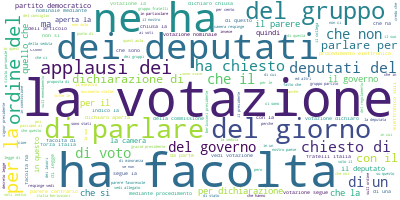

In [260]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = data_words
long_string = [item for sublist in long_string for item in sublist]
long_string = separator.join(long_string)
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

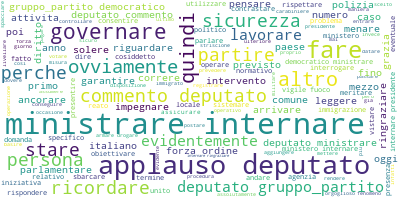

In [262]:
# Import the wordcloud library
# Join the different processed titles together.
long_string = politici_puliti['MATTEO SALVINI']
long_string = [item for sublist in long_string for item in sublist]
long_string = separator.join(long_string)
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

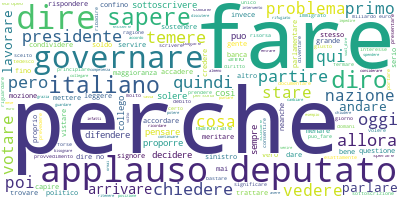

In [263]:
# Import the wordcloud library
# Join the different processed titles together.
long_string = politici_puliti['GIORGIA MELONI']
long_string = [item for sublist in long_string for item in sublist]
long_string = separator.join(long_string)
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [146]:
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=10) #devo alzare la soglia? è giusto che lo faccio su tutti?
trigram = gensim.models.Phrases(bigram[data_words], threshold=10)  

In [147]:
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [150]:
print(trigram_mod[bigram_mod[data_words[10]]])

['ordine_del_giorno_reca', 'la', 'costituzione', 'della_giunta', 'delle_elezioni', 'provvisoria', 'la', 'proclamazione', 'dei_deputati', 'subentranti', 'poiche', 'tuttavia', 'non', 'vi', 'sono', 'adempimenti', 'che', 'devono_essere', 'svolti', 'da', 'tale', 'organo', 'non', 'necessario', 'procedere_alla', 'sua', 'costituzione', 'votazione', 'per_elezione', 'del', 'presidente', 'della_camera', 'primo', 'scrutinio']


In [157]:
import nltk
from nltk.corpus import stopwords

In [158]:
nlp = spacy.load("it_core_news_sm")
stop_words = set(stopwords.words('italian'))

In [160]:
nlp = spacy.load("it_core_news_sm", disable=['parser', 'ner'])

In [161]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [162]:
politici_puliti = {}

In [163]:
for cog in cognomi_XVIII:
    politici_puliti[cog] = remove_stopwords(politici[cog])
    politici_puliti[cog] = make_bigrams(politici_puliti[cog])
    politici_puliti[cog] = lemmatization(politici_puliti[cog], allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
    

In [165]:
for cog in politici_puliti.keys():
    pickle.dump( politici_puliti[cog], open( 'Discorsi_puliti_XVIII_topic/'+cog+".p", "wb" ) )

In [186]:
data_words = []
for cog in cognomi_XVIII:
    l = []
    for d in politici_puliti[cog]:
        l.append(d)
    flat_list = [item for sublist in l for item in sublist]
    data_words.append(flat_list) #lista, ogni lista è un politico con l'insieme di tutti gli interventi

In [188]:
print(len(data_words))

108


In [189]:
id2word = corpora.Dictionary(data_words)

In [190]:
texts = data_words #dovrei tenere la divisione tra politi

In [191]:
corpus = [id2word.doc2bow(text) for text in texts]

In [192]:
print(corpus[:1])

[[(0, 3), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 26), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 3), (13, 2), (14, 5), (15, 2), (16, 6), (17, 1), (18, 1), (19, 2), (20, 1), (21, 1), (22, 10), (23, 1), (24, 6), (25, 2), (26, 1), (27, 1), (28, 2), (29, 10), (30, 1), (31, 1), (32, 2), (33, 19), (34, 1), (35, 1), (36, 1), (37, 1), (38, 5), (39, 10), (40, 1), (41, 4), (42, 3), (43, 7), (44, 2), (45, 4), (46, 1), (47, 2), (48, 1), (49, 3), (50, 1), (51, 2), (52, 1), (53, 1), (54, 1), (55, 3), (56, 1), (57, 3), (58, 1), (59, 2), (60, 1), (61, 1), (62, 1), (63, 4), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 8), (71, 1), (72, 16), (73, 2), (74, 1), (75, 1), (76, 1), (77, 28), (78, 4), (79, 9), (80, 1), (81, 3), (82, 1), (83, 1), (84, 3), (85, 2), (86, 1), (87, 4), (88, 1), (89, 3), (90, 1), (91, 3), (92, 2), (93, 1), (94, 1), (95, 1), (96, 1), (97, 9), (98, 4), (99, 1), (100, 21), (101, 2), (102, 1), (103, 2), (104, 1), (105, 1), (106, 4), (107, 4), (108, 1), (109, 1), 

In [193]:
id2word[0]

'abbastanza'

In [200]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('abbastanza', 3),
  ('abbracciare', 1),
  ('abitativo', 1),
  ('abituare', 1),
  ('abolire', 1),
  ('abolizione', 1),
  ('accadere', 26),
  ('accaduto', 1),
  ('accaduto_ieri', 1),
  ('accampare', 1),
  ('accanimento', 1),
  ('accanire', 1),
  ('accantonamento', 3),
  ('accantonare', 2),
  ('accedere', 5),
  ('accettabile', 2),
  ('accettare', 6),
  ('accetto', 1),
  ('accingiamo_votare', 1),
  ('accogliere', 2),
  ('accompagnare', 1),
  ('accordandoci', 1),
  ('accordare', 10),
  ('accorgera', 1),
  ('accorgere', 6),
  ('accorgimento', 2),
  ('accrescere', 1),
  ('accusa', 1),
  ('accusare', 2),
  ('addirittura', 10),
  ('adeguare', 1),
  ('adeguarsi', 1),
  ('adempimento', 2),
  ('adesso', 19),
  ('adibito', 1),
  ('adoperare', 1),
  ('adoperero', 1),
  ('adottare', 1),
  ('affermare', 5),
  ('affermazione', 10),
  ('affettuoso', 1),
  ('affidare', 4),
  ('affinche', 3),
  ('affrontare', 7),
  ('agenzia', 2),
  ('agevolare', 4),
  ('aggiramento', 1),
  ('aggirare', 2),
  ('aggiung

### build the topic modeling

Così faccio un modello unico, altrimenti potrei fare un modello per ogni politico e vedere come varia

In [201]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [202]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.020*"contrariare" + 0.013*"ritiro_parere" + 0.011*"relatrice" + '
  '0.011*"ricostruzione" + 0.010*"invitare" + 0.008*"emendamento" + '
  '0.006*"comune" + 0.006*"perche" + 0.005*"articolare" + 0.005*"intervento"'),
 (1,
  '0.007*"stare" + 0.007*"deputato" + 0.006*"fare" + 0.006*"internare" + '
  '0.005*"quindi" + 0.005*"ministrare" + 0.005*"ministero" + '
  '0.004*"intervento" + 0.004*"partire" + 0.004*"applauso"'),
 (2,
  '0.014*"perche" + 0.013*"fare" + 0.009*"presidente" + 0.009*"governare" + '
  '0.008*"dire" + 0.007*"quindi" + 0.007*"deputato" + 0.006*"applauso" + '
  '0.005*"partire" + 0.005*"leggere"'),
 (3,
  '0.019*"perche" + 0.016*"fare" + 0.009*"allora" + 0.009*"quindi" + '
  '0.009*"dire" + 0.007*"deputato" + 0.007*"governare" + 0.006*"leggere" + '
  '0.006*"piccolo" + 0.006*"stare"'),
 (4,
  '0.001*"scrutinio" + 0.001*"scheda" + 0.001*"due_terzi" + '
  '0.001*"visualizzare" + 0.001*"procedero" + 0.001*"dichiarate_nulle" + '
  '0.001*"autorizzera" + 0.001*"filmat

In [203]:
print('\nPerplexity: ', lda_model.log_perplexity(corpus)) 


Perplexity:  -7.953953322794389


In [204]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.40757883241150716


In [205]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.082404 -0.024316       1        1  66.860260
6      0.052349  0.167325       2        1  19.733328
1      0.126991 -0.052777       3        1   5.204032
3      0.144989 -0.080742       4        1   2.195413
9     -0.065926  0.181087       5        1   2.168215
7      0.120606 -0.025721       6        1   1.413294
8      0.105596  0.006494       7        1   1.220564
0      0.064755 -0.072853       8        1   0.965932
5     -0.298613 -0.060483       9        1   0.224552
4     -0.333151 -0.038015      10        1   0.014404, topic_info=                Term          Freq         Total Category  logprob  loglift
795          facolta  10384.000000  10384.000000  Default  30.0000  30.0000
1411          perche  16279.000000  16279.000000  Default  29.0000  29.0000
805             fare  14993.000000  14993.000000  Default  28.0000  28.0000
1339          ordine   8442.000000   8442.000000  Default  27.0000  27.0000
345         chiedere  11865.000000  11865.000000  Default  26.0000  26.0000
...              ...           ...           ...      ...      ...      ...
254   bianchi_matteo      0.108961      5.964522  Topic10  -7.5937   4.8428
1866          scheda      0.222614     58.480980  Topic10  -6.8793   3.2744
697        due_terzi      0.141848     18.050987  Topic10  -7.3300   3.9992
836          filmato      0.112056     13.914594  Topic10  -7.5657   4.0237
2011       spogliare      0.098201     14.345712  Topic10  -7.6977   3.8612

[791 rows x 6 columns], token_table=       Topic      Freq             Term
term                                   
33091      3  0.965937          abbozzo
2289       1  0.679446       abitazione
2289       2  0.095697       abitazione
2289       3  0.143545       abitazione
2289       8  0.066988       abitazione
...      ...       ...              ...
7785       9  0.925100   xi_commissione
7787       1  0.363666  xii_commissione
7787       2  0.545500  xii_commissione
7787       9  0.090917  xii_commissione
23110      8  0.720031       zona_rossa

[2165 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 7, 2, 4, 10, 8, 9, 1, 6, 5])

In [199]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_words):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_words)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

TypeError: '<' not supported between instances of 'int' and 'tuple'

In [ ]:
tokens = lambda text: [x.lemma_ for x in nlp(text) if x.pos_ not in ['PUNCT', 'SPACE'] and not x.is_stop]
all_tokens = lambda text: [x.lemma_ for x in nlp(text) if x.pos_ not in ['PUNCT', 'SPACE']]

In [ ]:
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [ ]:
print(trigram_mod[bigram_mod[data_words[0]]])